<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Group Project </h2><h3>(8 Students per Group)</h3></th>
    </tr>
</table>

## Objectives
##### After completing this assignment, you should be able to:
1. Build Machine Learning Models to solve classification and regression problems
2. Extract and collect data online, clean and prepare the data, explore and understand the data.
2. Select, Train and Evaluate the machine learning models
3. Fine-tuning model hyperparameters using grid search or other suitable methods
4. Use the model to make predictions

## Datasets
Extract and collect data online to solve two problems:

1. Classification Problem
2. Regression Problem

#### Popular sources for machine learning datasets:

https://www.kaggle.com/datasets

https://archive.ics.uci.edu/ml/index.php

https://registry.opendata.aws/

https://datasetsearch.research.google.com/

https://msropendata.com/


## Instructions

The below template only provides you a basic structure for you to solve the problem. Feel free to **add in more cells** and include more steps where necessary to achieve the goal of the project.

## 1. Classification Problem:

### Step 1: Import Data and Perform Data Preparation & Exploration
Remember to split data into train data and test data

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine-tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [ ]:
# Model 1
# Enter your code here:


In [ ]:
# Model 2
# Enter your code here:


In [ ]:
# Model 3 
# Enter your code here:


In [ ]:
# Model 4 (optional)
# Enter your code here:


In [ ]:
# Model 5 (optional)
# Enter your code here:



### Step 3: Recommend the Best Model and Explain the Reasons

Explain your answer here:



In [ ]:
# Enter your code here (if required):



### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. confusion matrix, precision & recall and etc.)


In [ ]:
# Enter your code here:




### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:



## 2. Regression Problem

### Step 1: Import Data and Perform Data Preparation & Exploration

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from collections import Counter
from sklearn.datasets import load_boston
from sklearn import linear_model, neighbors, tree, svm, ensemble

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
dataset['MEDV'] = boston_dataset.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (455, 13)
Shape of X_test:  (51, 13)
Shape of y_train:  (455, 1)
Shape of y_test (51, 1)


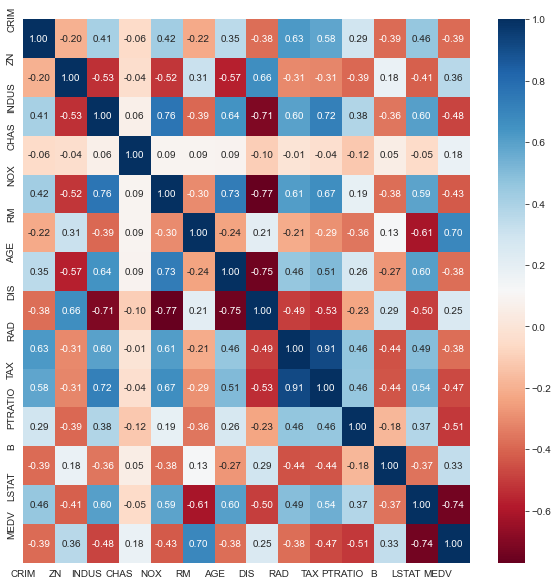

In [5]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Step 2: Select, Train, Evaluate and Fine Tuning the Models
Please shortlist two to five promissing models, provide details on how you fine tuning the model hyperparameters (e.g. using Grid Saerch, Random Search and etc.). Feel free to add in more cells. 

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [15]:
#Model 1 Random Forest model
regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=200, random_state=0)

In [35]:
n_estimators = [1000, 300, 75, 100, 200, 250,  400, 500]
train_acc = []
test_acc = []

for d in n_estimators:
    regressor_rf = RandomForestRegressor(n_estimators = d, random_state = 0)
    regressor_rf.fit(X_train, y_train)
    train_acc.append(regressor_rf.score(X_train, y_train))
    test_acc.append(regressor_rf.score(X_test, y_test))
print('train_acc:',regressor_rf.score(X_train, y_train),
      '\n test_acc:',regressor_rf.score(X_test, y_test))
print(train_acc.index(min(train_acc)))
print(test_acc.index(min(test_acc)))

train_acc: 0.9855274907001907 
 test_acc: 0.6681549406765468
2
7


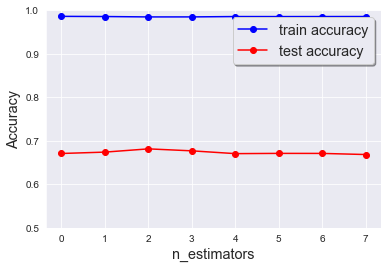

In [36]:
plt.plot(range(8), train_acc, 'bo-', label = 'train accuracy')
plt.plot(range(8), test_acc, 'ro-', label = 'test accuracy')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy',fontsize='x-large')
plt.ylim(0.5,1)
plt.legend(loc='best', shadow =True, fontsize='x-large')
plt.show()

In [37]:
param_grid = {'n_estimators' : [1000, 300, 75, 100, 200, 250,  400, 500]}

grid_search = GridSearchCV(regressor_rf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',n_jobs=-1)

In [38]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=0),
             n_jobs=-1,
             param_grid={'n_estimators': [1000, 300, 75, 100, 200, 250, 400,
                                          500]},
             scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'n_estimators': 75}

In [43]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train, cv = 10)
# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)
# Predicting MSE the Train set results
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
# Predicting MSE the Test set results
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
# Predicting MSE the Train set results
rmse_rf_train = (np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))
# Predicting RMSE the Test set results
rmse_rf_test = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print(f"Mean Squared Error (train): {mse_rf_train}")
print(f"Mean Squared Error (train): {mse_rf_test}")
print(f"Root-mean-square deviation(train): {rmse_rf_train}")
print(f"Root-mean-square deviation(test): {rmse_rf_test}")

CV:  0.8717875699406411
R2_score (train):  0.9855274907001907
R2_score (test):  0.6681549406765468
Mean Squared Error (train): 1.267488359296702
Mean Squared Error (train): 18.6529253035295
Root-mean-square deviation(train): 1.1258278550900673
Root-mean-square deviation(test): 4.318903252392846


      RM  LSTAT  PTRATIO      MDEV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
train_mae: 40391.55655290168 
 test_mae: 55539.77660036271


C:\Users\22832\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


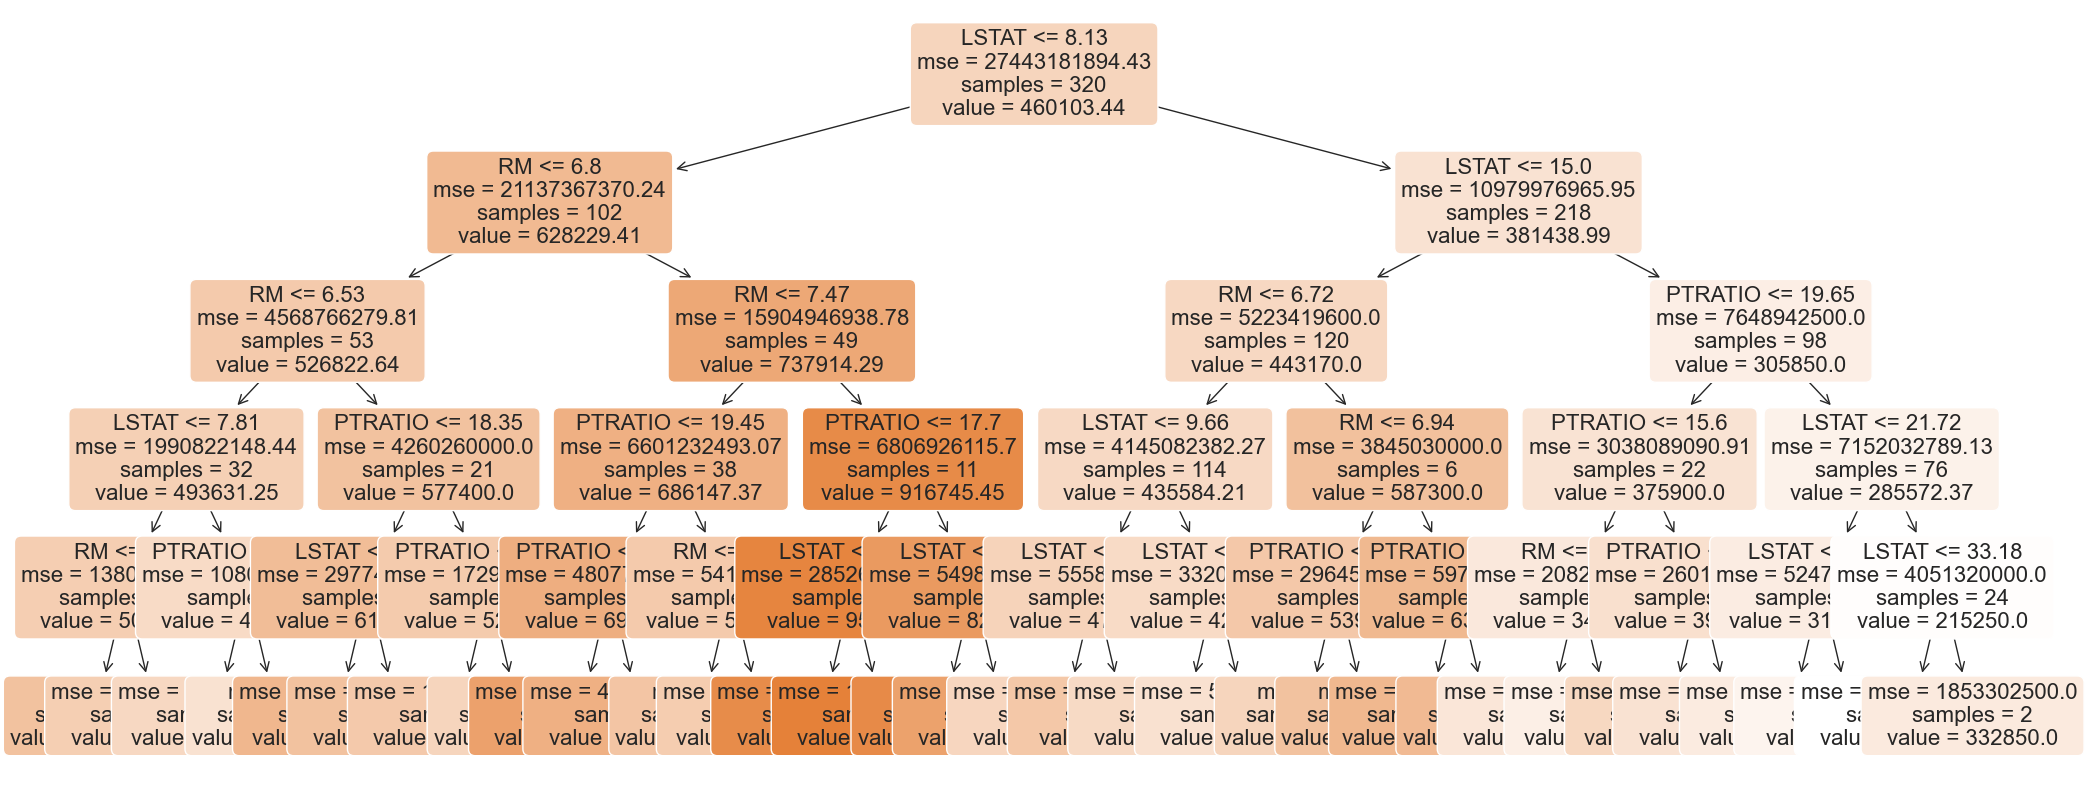

-6909055086.842728
{'criterion': 'mse', 'max_depth': 4}
DecisionTreeRegressor(criterion='mse', max_depth=4)
train_mae: 44998.41466346154 
 test_mae: 53472.865384615376


C:\Users\22832\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\22832\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.7908555973433586

In [64]:
#Model 2 Decision tree model
# Loading the data
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
housing = pd.read_csv('housing.csv')
print(housing.head())

# Sample a small subset of the data
housing = housing.sample(400, random_state =5)
# Set the "MDEV" as target/model output and the rest features as model inputs
y = housing['MDEV']
X = housing.drop(['MDEV'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

#Decision Tree Model
dt_reg = tree.DecisionTreeRegressor(criterion = 'mse', max_depth=5)
dt_reg.fit(X_train, y_train)
print('train_mae:', mean_absolute_error(dt_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(dt_reg.predict(X_test), y_test))
plt.figure(figsize=(25,10))
tree.plot_tree(dt_reg,
               feature_names = X_train.columns,
               rounded = True,
               filled= True,
               precision =2, 
               fontsize =16)
plt.show() 
# Use GridSearch to find the best combination of model hyperparameters

param_grid = {"criterion" : ["mse", "friedman_mse"], 
              'max_depth' : [2,3,4,5,6,7]}

gs_reg = GridSearchCV(dt_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)

gs_reg.fit(X_train, y_train)
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)
#Decision Tree Final Model
dt_reg = gs_reg.best_estimator_ 
dt_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(dt_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(dt_reg.predict(X_test), y_test))
dt_reg.score(X_test, y_test)

In [8]:
# Model 3 Locally Weighted Regression

class LocallyWeightedRegression:
    """Locally Weighted Regression (LWR).
    @Author: Yunpeng Tai 
    @Date: 2023/2/10
    
    Usage:
        >>> model = LocallyWeightedRegression()
        >>> model.fit(x_train, y_train)
        >>> model.predict(x_eval)
    """
    def __init__(self, lr=0.2, max_iter=100, eps=1e-5,
                 theta_0=None, tau=0.5):
        """
        Args:
            lr: Learning rate.
            max_iter: Maximum number of iterations.
            eps: Threshold for determining convergence.
            theta_0: Initial value for theta. If None, use the zero vector.
        """
        self.tau = tau
        self.theta = theta_0
        self.lr = lr
        self.max_iter = max_iter
        self.eps = eps

    def fit(self, x, y):
        """Fit the data by saving the data.
        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m, ).
        """
        self.x = x
        self.y = y
    
    def predict(self, x):
        """Fit the prediction by solving the normal equation
           theta = (X^{T}WX)^{-1}y^{T}WX.
           w^{(i)} = exp(-(self.x - x)**2 / 2tau ** 2).

        Args:
            x: Inputs of shape (l, n).
        
        Returns:
            Outputs of shape (l, ).
        """
        # insert new dimension into x to broadcast
        # s.t. every test sample can calculate differences with the whole training set
        w_vector = np.exp(-np.linalg.norm(self.x - x[:, None, :], ord=2, axis=2) ** 2 / (2 * self.tau ** 2))
        # (l, m) -> diagonal matrix: (l, m, m), each corresponds to a single input
        w = np.apply_along_axis(np.diag, axis=1, arr=w_vector) / 2
        theta = np.linalg.pinv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y
        return np.einsum('ij, ij -> i', x, theta)

In [10]:
taus = range(10, 100, 10)
best_train_error = 1e6
best_test_error = 1e6
best_tau = 0
best_pred = None

for tau in taus:
    lr_local = LocallyWeightedRegression(tau=tau)
    lr_local.fit(X_train, y_train.flatten())
    lr_train_pred, lr_test_pred = map(lr_local.predict, (X_train, X_test))
    train_error = mean_squared_error(y_train, lr_train_pred)
    test_error = mean_squared_error(y_test, lr_test_pred)

    if best_test_error > test_error:
        best_test_error = test_error
        best_train_error = train_error
        best_tau = tau
        best_pred = (lr_train_pred, lr_test_pred)

print('tau = %d'%best_tau)
print('Mean Squared Error (train): %f'% best_train_error)
print('Mean Squared Error (test): %f'% best_test_error)
print('R2_score (train): %f'%r2_score(y_train, best_pred[0]))
print('R2_score (test): %f'%r2_score(y_test, best_pred[1]))

tau = 20
Mean Squared Error (train): 4.235136
Mean Squared Error (test): 8.049617
R2_score (train): 0.950496
R2_score (test): 0.889886


### Step 3: Recommend the Best Model and Explain the Reasons

Enter your answer here:



In [ ]:
# Enter your code here (if required):




### Step 4: Use the best model to make prediction
Make prediction on the test data and provide the error analysis on the results (e.g. 95% confidence interval, visualization tools and etc.)

In [ ]:
# Enter your code here:



### Step 5: Save the Best Model for Future Use

In [ ]:
# Enter your code here:



 
 
## <center>End of Assignment<center>
---